<a href="https://colab.research.google.com/github/chayaphon/DADS6003/blob/main/Regression/ML1/house_price_prediction.ipynb#scrollTo=IzFf1CXgipHb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Data

In [1]:
import pandas as pd

# Load data to DataFrame
housing_data = pd.read_csv('https://raw.githubusercontent.com/chayaphon/DADS6003/main/Regression/ML1/Housing.csv')
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Data Transformation

In [2]:
# check null
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [3]:
# Mapping binary categorical variables
mapping_column = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for var in mapping_column:
    housing_data[var] = housing_data[var].map({'yes': 1, 'no': 0})
    
# Mapping values in the 'furnishingstatus' column
housing_data['furnishingstatus'] = housing_data['furnishingstatus'].map({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})

# Display dataframe afer changes
display(housing_data)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [4]:
# Check maping value
mapping_column.append('furnishingstatus')
unique_values = {var: housing_data[var].unique() for var in mapping_column}
unique_values

{'mainroad': array([1, 0]),
 'guestroom': array([0, 1]),
 'basement': array([0, 1]),
 'hotwaterheating': array([0, 1]),
 'airconditioning': array([1, 0]),
 'prefarea': array([1, 0]),
 'furnishingstatus': array([2, 1, 0])}

## Machine Learning Model

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Independent variables (all columns except 'price')
X = housing_data.drop('price', axis=1)

# Dependent variable (price)
y = housing_data['price']

# Splitting data into training and testing sets (test-set 20%, train-set 80%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)

# Model coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print('mse :', mse)
print('coefficients :', coefficients)
print('intercept :', intercept)

mse : 986041803890.0266
coefficients : [2.53732234e+02 1.26430216e+05 1.00306572e+06 4.31159234e+05
 4.34983941e+05 3.95198712e+05 3.30288607e+05 1.20896581e+06
 8.59967238e+05 2.20086777e+05 6.93749764e+05 2.55656836e+05]
intercept : -406907.46317562833


## Ploting Result accuracy for Actual and Predicted

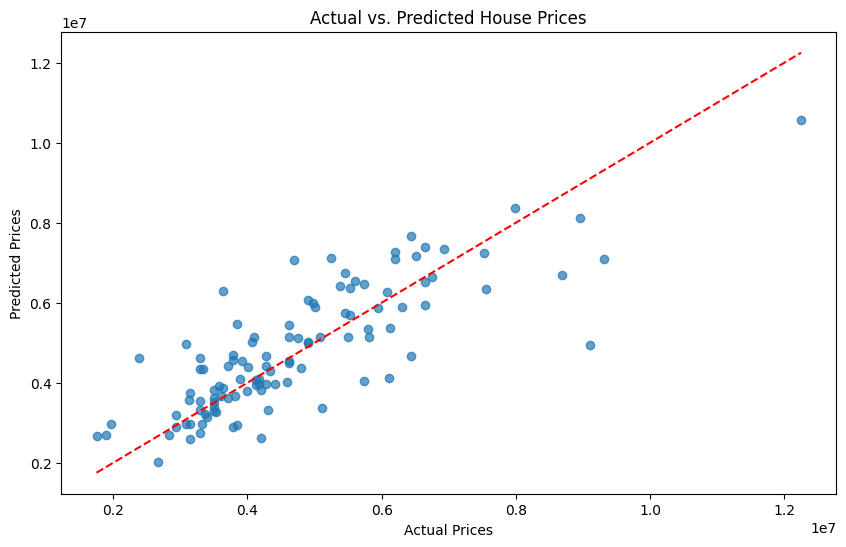

In [6]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices')
plt.show()

## Testing

### Predict X_new

In [7]:
X_new = {
    'area' : [7500],
    'bedrooms': [4],
    'bathrooms': [2],
    'stories': [2],
    'mainroad': [1],
    'guestroom': [0],
    'basement': [1],
    'hotwaterheating': [0],
    'airconditioning': [1],
    'parking': [3],
    'prefarea': [1],
    'furnishingstatus': [2]
}
X_new_data = pd.DataFrame(X_new)
predicted_price = model.predict(X_new_data)

print('Predicted price is :', predicted_price)

Predicted price is : [8360818.61839814]


### Export Model

In [8]:
#Dump Model
import pickle

pickle.dump(model, open('ml_6610422007.sav','wb') )

### Import Model

In [9]:
#Load Model and Prediction
loaded_model = pickle.load(open('ml_6610422007.sav', 'rb'))
predicted_price = loaded_model.predict(X_new_data)

print('Predicted price is :', predicted_price)

Predicted price is : [8360818.61839814]
